# Homework 1: Numerical Integration (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 01.05.2020.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

## Introduction

In this exercise we will numerically evaluate the integral

$$ y_n = y_n(a) = \int_0^1 \left( \frac{x^n}{x+a} \right) dx = \frac{1}{n} - a y_{n-1} .$$

### a)  Plot the integrand for $a = 5$ and $n = 1, 5, 10, 20, 30, 50$ in the domain $0 \leq x \leq 1$.

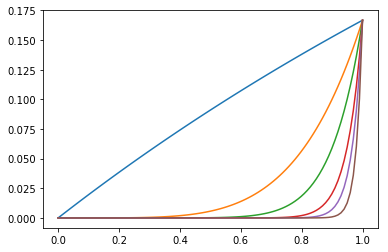

In [2]:
#Variables
a = 5
n = np.array([1, 5, 10, 20, 30, 50])
x = np.linspace(0,1,100)

#Define function
def integrand(x,n):
    return x**n/(x+a)

#Create a plot for each value in array n from blue to brown
for nval in n:
    plt.plot(x, integrand(x, nval))

### b) Write a computer program that reads the value of $a$, the starting values $n_0$ and $y_0$, and the final value $n_1$, and performs the iteration from $n_0$ to $n_1$ (either backward or forward, depending on whether $n_1 < n_0$ or $n_0 < n_1$).

In [3]:
#Read the value of a, n_0, y_0 and n_1
a = 5
n0 = 0
n1 = 30
y0 = np.log((1+a)/a)

#Function that returns y_n dependent on y_{n-1}
def yn_forward(a,n,y):
    return 1/n - a * y

#Function that returns y_{n-1} dependent on y_n
def yn_backward(a,n,y):
    return 1/(n*a) - y/a

#Final function that performs the iterations from n_0 to n_1
y = y0
def yn(a,n0,n1,y):
    if n0 < n1: #perform the forward iteration
        for i in range(n0,n1):
            y = yn_forward(a,i+1,y)
        return y
    if n0 == n1: #no iteration, return y_0
        return y
    if n0 > n1: #perform the backward iteration
        for i in range(n1,n0): 
            y = yn_backward(a,n0-(i-n1),y)
        return y
        
print(yn(a,n0,n1,y0))

-36668.8030261


### c) Experiment how this series behaves for iterations from $n_0 = 0$ to $n_1 = 30$ for $y_0 =\ln[(1 + a)/a]$ with $a = 5$. Also try starting with $n_0 = 50$ and iterate back to $n_1 = 30$ for any starting value $y_0$.

In [4]:
#Read the value of a, n_0, y_0 and n_1
a = 5
n0 = 0
n1 = 30
y0 = np.log((1+a)/a)
        
print(yn(a,n0,n1,y0))

-36668.8030261


### Summary of the results:

- The series diverges for the forward iteration when $a > 1$.
- It yields unreasonable results, since $y_n$ should never get negative!

In [5]:
#Try backward iteration
a = 5
n0 = 50
n1 = 30

for y in np.linspace(0,5,11):
    print(yn(a,n0,n1,y))

0.00540463296514
0.00540463296515
0.00540463296515
0.00540463296516
0.00540463296516
0.00540463296517
0.00540463296517
0.00540463296518
0.00540463296518
0.00540463296519
0.00540463296519


### Summary of the results:

- The series converges for the backward iteration, no matter what $a$ is.
- The backward iteration is very stable, independent of the start value $y_0$!